### Korean Corona Cases

In [1]:
import helper

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('PatientInfo.csv')

In [4]:
df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2.002000e+09,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1.000000e+09,2,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          5165 non-null   object 
 1   sex                 4042 non-null   object 
 2   age                 3784 non-null   object 
 3   country             5164 non-null   object 
 4   province            5164 non-null   object 
 5   city                5070 non-null   object 
 6   infection_case      4245 non-null   object 
 7   infected_by         1345 non-null   float64
 8   contact_number      791 non-null    object 
 9   symptom_onset_date  690 non-null    object 
 10  confirmed_date      5161 non-null   object 
 11  released_date       1587 non-null   object 
 12  deceased_date       66 non-null     object 
 13  state               5164 non-null   object 
dtypes: float64(1), object(13)
memory usage: 565.0+ KB


In [6]:
print(f"Fraction of NA's in column sympton_onset_date: {df['symptom_onset_date'].isna().mean()}\n\
Fraction of NA's in column confirmed_date: {df['confirmed_date'].isna().mean()}\n\
Fraction of NA's in column released_date: {df['released_date'].isna().mean()}\n\
Fraction of NA's in column deceased_date: {df['deceased_date'].isna().mean()}\n")

Fraction of NA's in column sympton_onset_date: 0.8664085188770572
Fraction of NA's in column confirmed_date: 0.0007744433688286545
Fraction of NA's in column released_date: 0.6927395934172313
Fraction of NA's in column deceased_date: 0.9872216844143272



Most of the date features are not useful since they have a high percentage of missing values. As a result we will drop these columns and we only keep the confirmed- and the released-date. Next to that we rop columns patient_id, country, state and infected_by, since these won't be helpful for the further analysis.
In a next step we will drop rows where released_date or confirmed_date is a null value. 
After that we transform the data type of these two objects from sting to datetime.

In [10]:
df = helper.prepare_df(df)

KeyError: ['confirmed_date', 'released_date']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 5161
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             1586 non-null   object
 1   age             1576 non-null   object
 2   province        1587 non-null   object
 3   city            1555 non-null   object
 4   infection_case  1013 non-null   object
 5   duration        1587 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 86.8+ KB


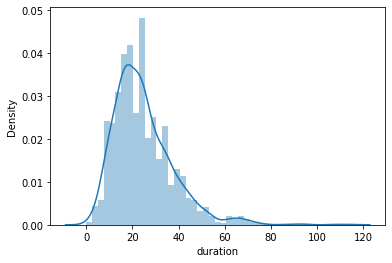

In [94]:
sns.distplot(df['duration']);

<AxesSubplot:xlabel='city', ylabel='count'>

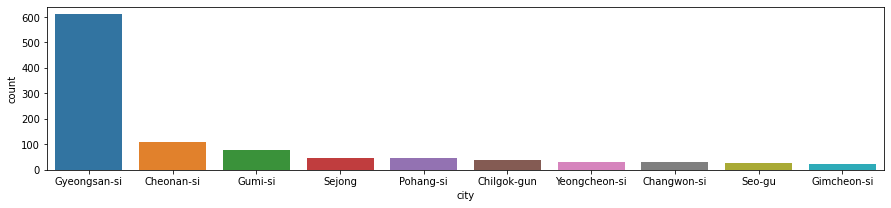

In [75]:
plt.figure(figsize = (15,3))
sns.countplot(x = "city", data = df, order=df.city.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='infection_case', ylabel='count'>

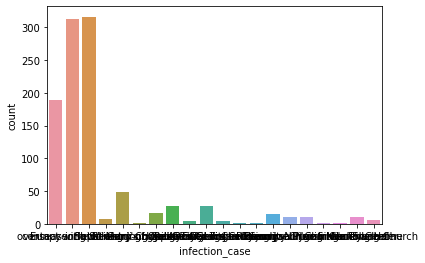

In [13]:
sns.countplot(x = "infection_case", data=df)